In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')
df


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [5]:
X=df.iloc[:,-1]
y=df.iloc[:,0]

Naive bayes basically works on the baise of bays rule suppose i have to predict somthing like will it rain or not on the basis of two independent variables like cloudy and humidity

it will basically calculate
p(rain/cloudy,humidity)=p(cloudy/rain)* p(humidity/rain) * p(rain) 
p(not rain/cloudy,humidity)=p(cloudy/not rain)* p(humidity/not rain) * p(not rain)
taking in the conditional independence as assumption

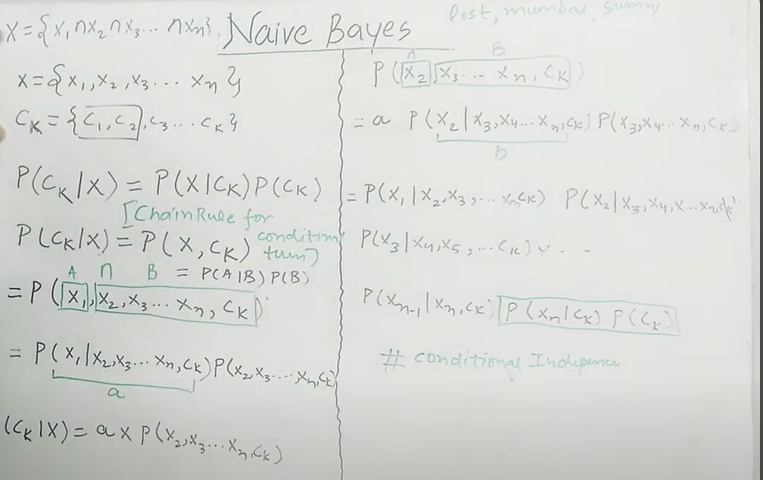
**credits-campusx(youtube)**
it will store the probabilites required to caluate this during the traiining and use it in the testing phase

now if it is numerical data and suppose x is a numerical feaure that contains differnt values between 1-100 and 99 is missing then the probability
p(rain/x,humidity)=p(x=99/rain)* p(humidity/rain) * p(rain) 
this p(x=99/rain) is caluated by assuming distributions of data
* Gaussian Naive Bayes: Assumes the features follow a normal distribution. Best for continuous data.
* Multinomial Naive Bayes: Used for discrete count data. Suitable for text classification problems like spam detection, where the features are word counts or frequencies.
* Bernoulli Naive Bayes: Used for binary/boolean data. Suitable for binary features, such as word presence/absence in text classification.

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

* Here we will first use the bag of word method by importing the countvectorizer method to convert the sentences to vectors to train the model

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
#Multinomial Naive Bayes: Used for discrete count data.
#Suitable for text classification problems like spam detection,
#where the features are word counts or frequencies.
from sklearn.naive_bayes import MultinomialNB

In [8]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [9]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.989237668161435
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       976
           1       1.00      0.91      0.95       139

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



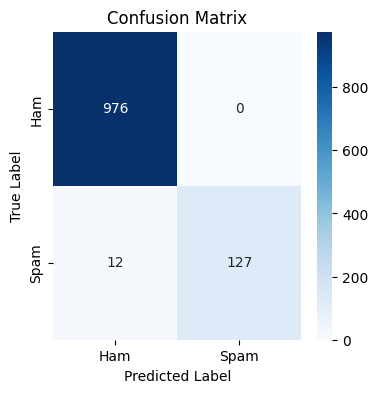

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

* we will be using the term frequency inverse documnet freqency method to convet the sentences into the vectors
* term frequency=(no of repeating word in sentence)/total number of words in the sentence
* inverse document frequency=loge(no of total sentence/no of sentences containg the word)
* using this formula various weight is assigned to the sentences and converted into the vector
* the less repeating the word is more the weight

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
clf2 = Pipeline([ 
    ('vectorizer', TfidfVectorizer()),     
    ('classifier', MultinomialNB())   
])

In [14]:
clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred2)
print(report)

Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       976
           1       1.00      0.71      0.83       139

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



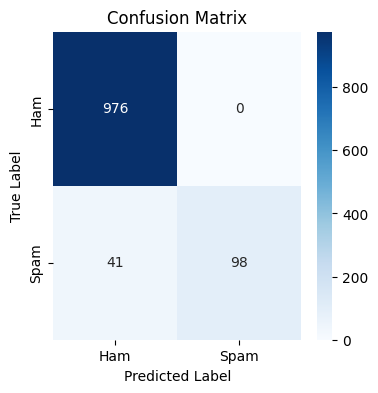

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred2)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import re
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    
    # Tokenize
    words = word_tokenize(text)
    
    #Remove stopwords and stem
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return ' '.join(words)

In [20]:
class TextPreprocessor:
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return [preprocess_text(text) for text in X]

In [21]:
clf1 = Pipeline([
    ('preprocessor', TextPreprocessor()),  
    ('vectorizer', TfidfVectorizer()),     
    ('classifier', MultinomialNB())   
])

In [22]:
clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

report = classification_report(y_test, y_pred1)
print(report)

Accuracy: 0.9641255605381166
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       976
           1       0.99      0.72      0.83       139

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.96      0.96      1115



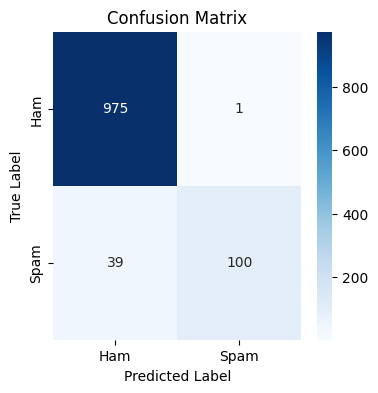

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred1)


plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()